# Data Engineering

In [98]:
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
from collections import Counter

df = pd.read_csv("vehicles.csv", index_col="id", parse_dates=True, infer_datetime_format=True)

print(list(df.columns))

df = df.drop([
    "model",
    "url",
    "region",
    "region_url",
    "image_url",
    "description",
    "VIN"
], axis="columns")

df = df.dropna(subset=["price", "year", "odometer", "lat", "long"])

df["price"] = round(df["price"], -3)

cnt_keys = np.array(list(Counter(df["price"]).keys()))
cnt_vals = list(Counter(df["price"]).values())

df = df[df["price"].isin(cnt_keys[np.abs(stats.zscore(cnt_vals)) < 1])]

df = df[(np.abs(stats.zscore(df[["price", "odometer", "lat", "long"]])) < 1).all(axis=1)]

df["condition"] = df["condition"].replace("like new", "new")
df["cylinders"] = df["cylinders"].fillna("0")
df["cylinders"] = df["cylinders"].replace("other", "0")

df["cylinders"] = pd.to_numeric(df["cylinders"].str.extract('(\d+\.?\d*)')[0], downcast="integer")

df[["price", "year", "cylinders", "odometer"]] = df[["price", "year", "cylinders", "odometer"]].astype(int)

display(df)
df.to_csv("clean.csv")

['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,
7316814884,34000,2014,gmc,good,8,gas,57923,clean,other,NaN,NaN,pickup,white,NaN,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
7316814989,40000,2020,chevrolet,good,8,gas,19160,clean,other,NaN,NaN,pickup,red,NaN,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
7316743432,31000,2017,toyota,good,8,gas,41124,clean,other,NaN,NaN,pickup,red,NaN,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
7316304717,35000,2016,chevrolet,good,6,gas,29499,clean,other,4wd,NaN,pickup,silver,NaN,al,32.590000,-85.480000,2021-05-03T12:41:33-0500
7316285779,35000,2019,toyota,excellent,6,gas,43000,clean,automatic,4wd,NaN,truck,grey,NaN,al,32.601300,-85.443974,2021-05-03T12:12:59-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301591199,34000,2018,lexus,good,6,gas,30814,clean,automatic,rwd,NaN,sedan,white,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600
7301591187,31000,2020,volvo,good,0,gas,12029,clean,other,fwd,NaN,sedan,red,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
7301591147,35000,2020,cadillac,good,0,diesel,4174,clean,other,NaN,NaN,hatchback,white,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600


# Univariate Analysis
## Quantitative

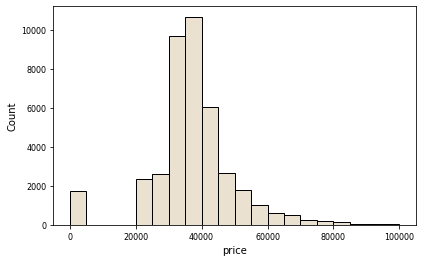

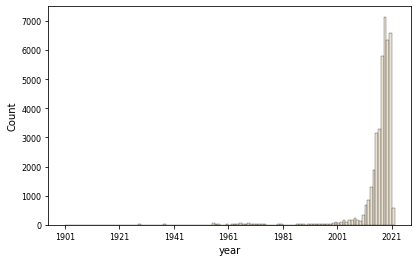

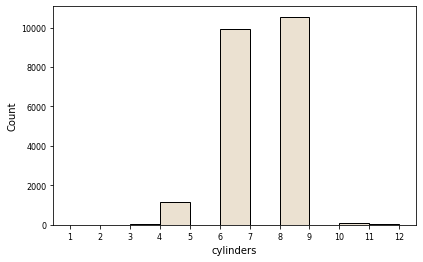

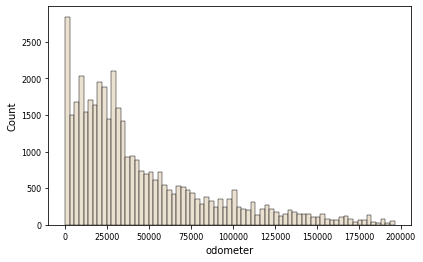

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML("""
    <style>
        .output_png {
            display: table-cell;
            text-align: center;
            vertical-align: middle;
        }
    </style>
""")

plt.rcParams["figure.figsize"] = (6.5, 4.017)
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

sns.set_palette("ch:.25")

sns.histplot(df["price"], bins=np.arange(0, 100001, step=5000))
plt.savefig("price_dist.png")
plt.show()

sns.histplot(df["year"], bins=np.arange(min(df["year"]), max(df["year"]) + 1))
plt.xticks(np.arange(min(df["year"]), max(df["year"]) + 1, step=20))
plt.savefig("year_dist.png")
plt.show()

sns.histplot(df["cylinders"][df["cylinders"] != 0], bins=np.arange(1, max(df["cylinders"]) + 1))
plt.xticks(np.arange(1, max(df["cylinders"]) + 1))
plt.savefig("cylinders_dist.png")
plt.show()

sns.histplot(df["odometer"])
plt.savefig("odometer_dist.png")
plt.show()

## Qualitative

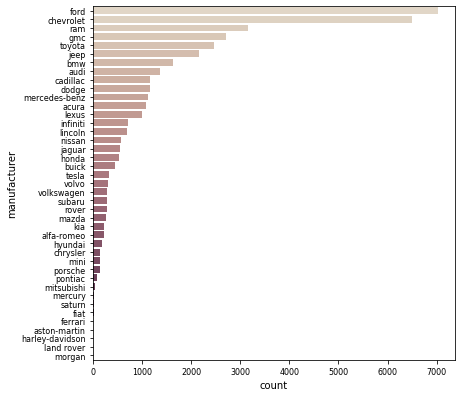

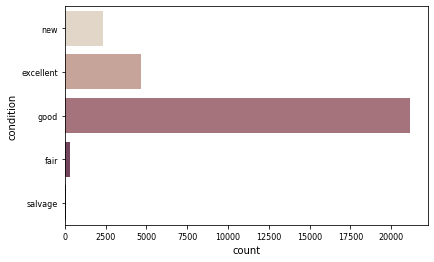

In [71]:
plt.figure(figsize=(6.5, 6.5))
sns.countplot(y=df["manufacturer"], order=df["manufacturer"].value_counts(ascending=False).index, palette="ch:.25")
plt.savefig("manufacturer_dist.png")
plt.show()

sns.countplot(y=df["condition"], order=["new", "excellent", "good", "fair", "salvage"], palette="ch:.25")
plt.savefig("condition_dist.png")
plt.show()

# Playground

In [97]:
print("test")
print(set(df["cylinders"]))

test
{0, '8 cylinders', '5 cylinders', '4 cylinders', '6 cylinders', '10 cylinders', '3 cylinders', '0', '12 cylinders'}
